# Vehicle Recalls

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Path to recalls dataset

In [2]:
recalls_dataset = '../Processed_Data/API/Recalls.pkl'

### Load Complaints Data

In [3]:
df_recalls = pd.read_pickle(recalls_dataset)
print(df_recalls.shape)
df_recalls.head()

(45033, 6)


,Component,Make,Manufacturer,Model,ModelYear,ReportReceivedDate
0,EXTERIOR LIGHTING,PONTIAC,SABERSPORT,BONNEVILLE,1999,2009
1,POWER TRAIN:AUTOMATIC TRANSMISSION,PONTIAC,GENERAL MOTORS CORP.,BONNEVILLE,1999,1999
2,"FUEL SYSTEM, GASOLINE:DELIVERY",PONTIAC,GENERAL MOTORS CORP.,BONNEVILLE,1999,2004
3,WHEELS,PONTIAC,GENERAL MOTORS CORP.,BONNEVILLE,1999,1999
4,ELECTRICAL SYSTEM,NABI,"North American Bus Industries, Inc.",LFW,2000,2013


## Count The Frequency For Each Components

**Each complaint may have mulitiple components at same time, we need split them by comma.**

In [11]:
def split_components(series):
 return pd.Series([x for list_ in series for x in list_.split(',')])
split_components(df_recalls['Component'])

0                                   EXTERIOR LIGHTING
1                  POWER TRAIN:AUTOMATIC TRANSMISSION
2                                         FUEL SYSTEM
3                                   GASOLINE:DELIVERY
4                                              WHEELS
                             ...                     
56626    ENGINE AND ENGINE COOLING:COOLING SYSTEM:FAN
56627                             WHEELS:HUBCAP/COVER
56628                                  STRUCTURE:BODY
56629                               STEERING:LINKAGES
56630                          EQUIPMENT:OTHER:LABELS
Length: 56631, dtype: object

**Now we can count the frequency.**

In [17]:
valueCount = split_components(df_recalls['Component'])\
                            .value_counts()\
                            .sort_values(ascending=False)
valueCount.head()

SERVICE BRAKES                            4445
FUEL SYSTEM                               3436
EQUIPMENT                                 3429
EQUIPMENT:RECREATIONAL VEHICLE/TRAILER    1854
 AND FITTINGS                             1563
dtype: int64

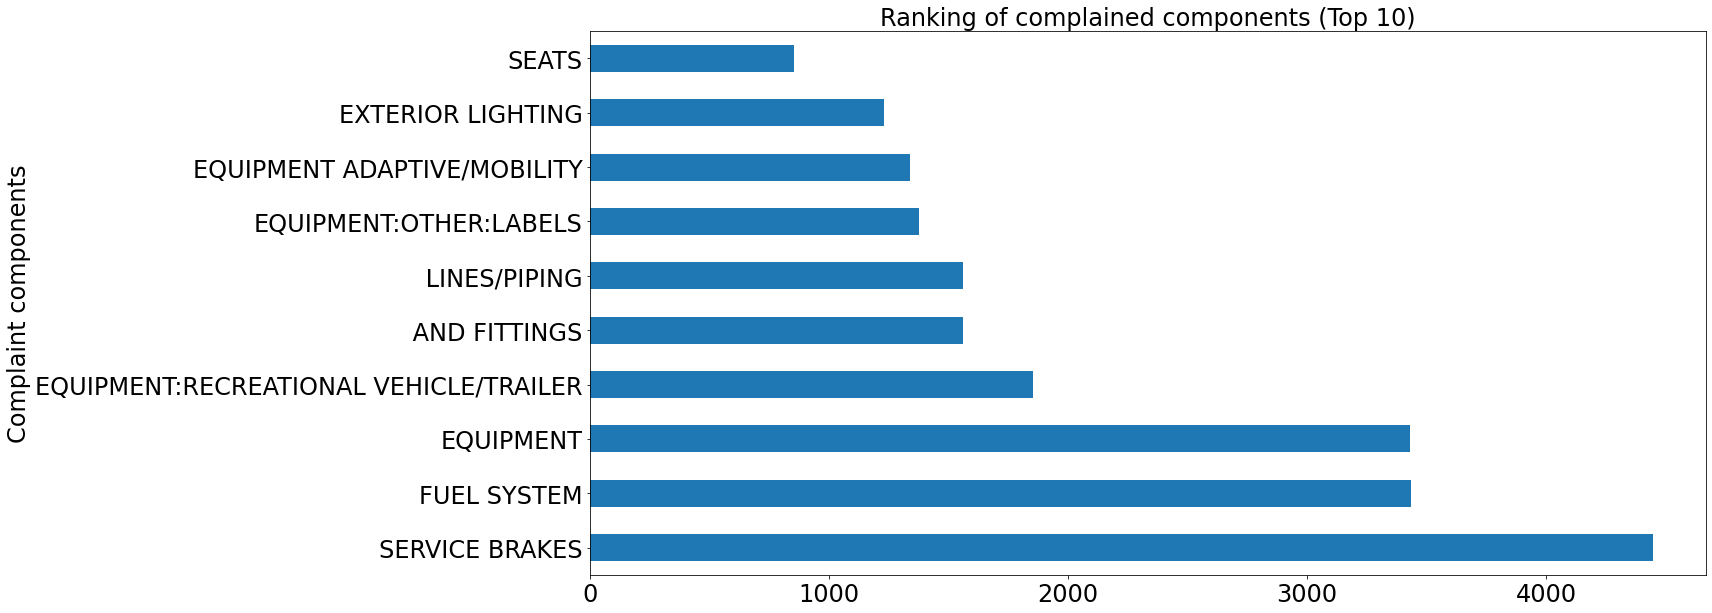

In [20]:
fig = plt.figure(figsize=(20,10))
# set up the bar chart
ax = valueCount.head(10).plot(kind="barh")
plt.title("Ranking of complained components (Top 10)", fontsize=24)
plt.ylabel("Complaint components", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24);
# Save as png image
fig.savefig('./Outputs/Recall_components_top10.png', format='png')

## Recall Date between vehicle released